In [1]:
import clr
import sys

In [2]:
assembly_path = r".\DLL" 
sys.path.append(assembly_path)
ref = clr.AddReference(r"SantecSPA")

In [3]:
import SantecSPA

In [4]:
spa = SantecSPA.SPAModule()

In [5]:
status = spa.Initialize("Dev7", "GPIB", 1, 0, " ", 0)
print(status)

0


In [7]:
spa.LoadOperationSettingsFromFile('Setting.ini')


0

In [8]:
status = spa.Scan(True)
print(status)

0


In [9]:
status, reference = spa.GetReflectanceReferenceOffset()
print(status)
print(reference)

0
-11.519414205602828


In [10]:
status, reference = spa.ExecuteReflectionReference()
print(status)
print(reference)

0
-11.490591455297796


In [11]:
status = spa.Scan()
print(status)

0


In [12]:
status, xValues, yValues = spa.GetReflectanceData()
print(status)
print(xValues)
print(yValues)

0
System.Double[]
System.Double[]


In [13]:
for x in xValues:
    print(float(x))

for y in yValues:
    print(float(y))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




-112.21231363069748
-112.16174632466621
-112.11118351803094
-112.0606740115445
-112.01026745809759
-111.96001441239565
-111.9099663498622
-111.86017570998791
-111.81069574274423
-111.76158056523724
-111.7128847090726
-111.66466311803208
-111.61697069502802
-111.56986198525703
-111.52339127388782
-111.47761259024546
-111.43257971922358
-111.3883460472237
-111.34496411897612
-111.30248511369507
-111.26095859456947
-111.22043224363884
-111.18095149414026
-111.14255951853747
-111.10529720434658
-111.06920291669306
-111.03431238875055
-111.00065878796966
-110.96827301082007
-110.93718401186626
-110.90741917882315
-110.87900485732126
-110.85196670089897
-110.82632970609365
-110.802117914326
-110.77935395441116
-110.75805874169066
-110.73825127943948
-110.71994851944302
-110.70316548672085
-110.68791557138445
-110.67421081612272
-110.66206202229003
-110.65147890804693
-110.64247005656574
-110.63504294890663
-110.62920387316342
-110.62495748067502
-110.62230651299816
-110.62125175796413
-110.

In [14]:
import matplotlib.pyplot as plt 

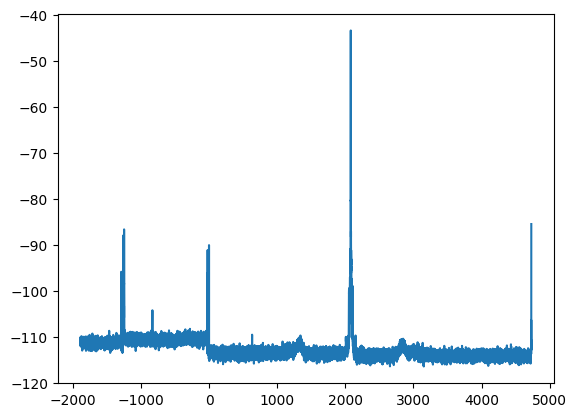

In [15]:
plt.plot(xValues, yValues) 
plt.show() 

In [16]:
from scipy.ndimage import gaussian_filter1d

In [17]:
y_smoothed = gaussian_filter1d(yValues, sigma=2)

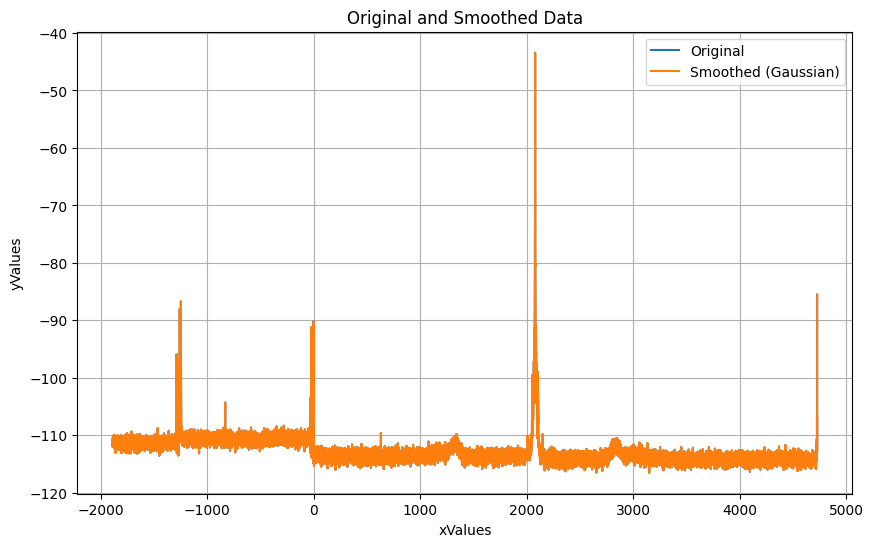

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(xValues, yValues, label='Original')
plt.plot(xValues, y_smoothed, label='Smoothed (Gaussian)')
plt.xlabel('xValues')
plt.ylabel('yValues')
plt.title('Original and Smoothed Data')
plt.legend()
plt.grid(True)
plt.show()